# Unit 5 - Financial Planning

In [60]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [61]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [62]:
# Set current amount of crypto assets
btc = 1.2
eth = 5.3

In [63]:
import json

In [64]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [65]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data'] ['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data'] ['1027']['quotes']['USD']['price']


# Compute current value of my crpto
btc_value = btc * btc_price
eth_value = eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $33212.40
The current value of your 5.3 ETH is $9338.97


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [66]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [67]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")
api

In [68]:
# Format current date as ISO format
today = pd.Timestamp("2022-10-31", tz = "America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_stock_port = api.get_bars(tickers, timeframe, start = today, end = today).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_port[df_stock_port['symbol']== "AGG"].drop('symbol', axis = 1)
SPY = df_stock_port[df_stock_port['symbol']== "SPY"].drop('symbol', axis = 1)


# Concatenate the ticker DataFrames
df_stock_port = pd.concat([AGG,SPY], axis = 1, keys = ['AGG', 'SPY'])

# Preview DataFrame
df_stock_port

AGG                                           \
                            open   high   low close    volume trade_count   
timestamp                                                                   
2022-10-31 04:00:00+00:00  95.01  95.06  94.6  94.9  10885550       31486   

                                        SPY                                   \
                               vwap    open   high     low   close    volume   
timestamp                                                                      
2022-10-31 04:00:00+00:00  94.89244  386.44  388.4  385.26  386.21  94154112   

                                                  
                          trade_count       vwap  
timestamp                                         
2022-10-31 04:00:00+00:00      590831  386.87683

In [69]:
# Pick AGG and SPY close prices
agg_close_price = float(df_stock_port['AGG']['close'])
spy_close_price = float(df_stock_port['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $94.9
Current SPY closing price: $386.21


In [70]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19310.50
The current value of your 200 AGG shares is $18980.00


### Savings Health Analysis

In [71]:
# Set monthly household income
monthly_household_income = 12000

# Consolidate financial assets data
values_data = {'amount' : [btc_value+eth_value, my_agg_value+my_spy_value]}
tickers_df = ['crypto', 'shares']

# Create savings DataFrame
df_savings = pd.DataFrame(values_data, index = tickers_df)

# Display savings DataFrame
display(df_savings)

,amount
crypto,42551.371
shares,38290.500


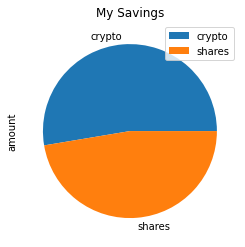

In [72]:
# Plot savings pie chart
plot = df_savings.plot(kind = 'pie',title = 'My Savings', y = 'amount')

In [73]:
# Set ideal emergency fund
emergency_fund = monthly_household_income * 3

# Calculate total amount of savings
total_savings = my_agg_value+btc_value+eth_value+my_spy_value

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congrats, you have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print(f"Congrats, you've reached your financial goal.")
else:
    print(f"Sorry, you've found yourself in a risky situation.")

Congrats, you have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [74]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-10-31', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-10-31', tz='America/New_York').isoformat()

In [75]:
# Get 5 years' worth of historical data for SPY and AGG
df_5year = api.get_bars(tickers, timeframe, start = start_date, end = end_date).df

# Reorganize the DataFrame
# Separate ticker data
AGG_5year = df_5year[df_5year['symbol']== "AGG"].drop('symbol', axis = 1)
SPY_5year = df_5year[df_5year['symbol']== "SPY"].drop('symbol', axis = 1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG_5year,SPY_5year], axis = 1, keys = ['AGG','SPY'])

# Display sample data
df_stock_data

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-10-31 04:00:00+00:00  109.52  109.5500  109.440  109.47   3719883   
2017-11-01 04:00:00+00:00  109.17  109.4100  109.170  109.29   2959362   
2017-11-02 04:00:00+00:00  109.35  109.4950  109.331  109.35   2160492   
2017-11-03 04:00:00+00:00  109.48  109.4800  109.290  109.45   1781239   
2017-11-06 05:00:00+00:00  109.56  109.5900  109.460  109.55   1294303   
...                           ...       ...      ...     ...       ...   
2022-10-25 04:00:00+00:00   94.39   94.7050   94.360   94.56  11361895   
2022-10-26 04:00:00+00:00   94.78   95.1700   94.760   94.98   7836932   
2022-10-27 04:00:00+00:00   95.21   95.6204   94.990   95.46   6874350   
2022-10-28 04:00:00+00:00   95.01   95.4600   94.980   95.22   6224403   
2022-10-31 04:00:00+00:00   95.01   95.0600   94.600   94.90  10885550   

                                                      SPY                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2017-10-31 04:00:00+00:00       10450  109.488193  257.18  257.44  256.805   
2017-11-01 04:00:00+00:00       11591  109.302138  258.04  258.43  257.070   
2017-11-02 04:00:00+00:00        8877  109.381316  257.41  257.75  256.190   
2017-11-03 04:00:00+00:00        9453  109.415086  257.77  258.50  257.300   
2017-11-06 05:00:00+00:00        7166  109.532241  258.30  259.00  258.220   
...                               ...         ...     ...     ...      ...   
2022-10-25 04:00:00+00:00       35359   94.522662  378.79  385.25  378.671   
2022-10-26 04:00:00+00:00       26772   94.951876  381.62  387.58  381.350   
2022-10-27 04:00:00+00:00       22018   95.420278  383.07  385.00  379.330   
2022-10-28 04:00:00+00:00       25972   95.234097  379.87  389.52  379.680   
2022-10-31 04:00:00+00:00       31486   94.892440  386.44  388.40  385.260   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-10-31 04:00:00+00:00  257.12   60678916      162728  257.164535  
2017-11-01 04:00:00+00:00  257.50   54263336      193085  257.717880  
2017-11-02 04:00:00+00:00  257.62   56449535      217328  257.251675  
2017-11-03 04:00:00+00:00  258.45   62908639      189765  258.119308  
2017-11-06 05:00:00+00:00  258.81   54815449      130424  258.660092  
...                           ...        ...         ...         ...  
2022-10-25 04:00:00+00:00  384.92   78656471      598158  382.991850  
2022-10-26 04:00:00+00:00  382.02  103779972      657066  383.877161  
2022-10-27 04:00:00+00:00  379.98   81650038      599316  381.339490  
2022-10-28 04:00:00+00:00  389.02  100160252      597379  385.648651  
2022-10-31 04:00:00+00:00  386.21   94154112      590831  386.876830  

[1259 rows x 14 columns]

In [76]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim = MCSimulation(portfolio_data= df_stock_data, weights = [.40,.60], num_simulation= 500, num_trading_days= 252 * 30)

In [77]:
# Printing the simulation input data
MC_sim.portfolio_data

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-10-31 04:00:00+00:00  109.52  109.5500  109.440  109.47   3719883   
2017-11-01 04:00:00+00:00  109.17  109.4100  109.170  109.29   2959362   
2017-11-02 04:00:00+00:00  109.35  109.4950  109.331  109.35   2160492   
2017-11-03 04:00:00+00:00  109.48  109.4800  109.290  109.45   1781239   
2017-11-06 05:00:00+00:00  109.56  109.5900  109.460  109.55   1294303   
...                           ...       ...      ...     ...       ...   
2022-10-25 04:00:00+00:00   94.39   94.7050   94.360   94.56  11361895   
2022-10-26 04:00:00+00:00   94.78   95.1700   94.760   94.98   7836932   
2022-10-27 04:00:00+00:00   95.21   95.6204   94.990   95.46   6874350   
2022-10-28 04:00:00+00:00   95.01   95.4600   94.980   95.22   6224403   
2022-10-31 04:00:00+00:00   95.01   95.0600   94.600   94.90  10885550   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-10-31 04:00:00+00:00       10450  109.488193          NaN  257.18   
2017-11-01 04:00:00+00:00       11591  109.302138    -0.001644  258.04   
2017-11-02 04:00:00+00:00        8877  109.381316     0.000549  257.41   
2017-11-03 04:00:00+00:00        9453  109.415086     0.000914  257.77   
2017-11-06 05:00:00+00:00        7166  109.532241     0.000914  258.30   
...                               ...         ...          ...     ...   
2022-10-25 04:00:00+00:00       35359   94.522662     0.009825  378.79   
2022-10-26 04:00:00+00:00       26772   94.951876     0.004442  381.62   
2022-10-27 04:00:00+00:00       22018   95.420278     0.005054  383.07   
2022-10-28 04:00:00+00:00       25972   95.234097    -0.002514  379.87   
2022-10-31 04:00:00+00:00       31486   94.892440    -0.003361  386.44   

                                                                           \
                             high      low   close     volume trade_count   
timestamp                                                                   
2017-10-31 04:00:00+00:00  257.44  256.805  257.12   60678916      162728   
2017-11-01 04:00:00+00:00  258.43  257.070  257.50   54263336      193085   
2017-11-02 04:00:00+00:00  257.75  256.190  257.62   56449535      217328   
2017-11-03 04:00:00+00:00  258.50  257.300  258.45   62908639      189765   
2017-11-06 05:00:00+00:00  259.00  258.220  258.81   54815449      130424   
...                           ...      ...     ...        ...         ...   
2022-10-25 04:00:00+00:00  385.25  378.671  384.92   78656471      598158   
2022-10-26 04:00:00+00:00  387.58  381.350  382.02  103779972      657066   
2022-10-27 04:00:00+00:00  385.00  379.330  379.98   81650038      599316   
2022-10-28 04:00:00+00:00  389.52  379.680  389.02  100160252      597379   
2022-10-31 04:00:00+00:00  388.40  385.260  386.21   94154112      590831   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-10-31 04:00:00+00:00  257.164535          NaN  
2017-11-01 04:00:00+00:00  257.717880     0.001478  
2017-11-02 04:00:00+00:00  257.251675     0.000466  
2017-11-03 04:00:00+00:00  258.119308     0.003222  
2017-11-06 05:00:00+00:00  258.660092     0.001393  
...                               ...          ...  
2022-10-25 04:00:00+00:00  382.991850     0.015969  
2022-10-26 04:00:00+00:00  383.877161    -0.007534  
2022-10-27 04:00:00+00:00  381.339490    -0.005340  
2022-10-28 04:00:00+00:00  385.648651     0.023791  
2022-10-31 04:00:00+00:00  386.876830    -0.007223  

[1259 rows x 16 columns]

In [78]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/anthonyfranco/Rutgers/My_Fintech_Work/02-Homework/HW-5-API-Financial-Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990197,1.008086,0.990498,0.999904,1.006285,1.011783,0.999839,0.997707,0.999034,0.991613,...,0.998252,0.993231,0.993742,1.003022,0.999488,1.001983,0.997818,0.998967,1.004160,1.001809
2,0.987935,1.018024,0.988463,0.992227,1.007779,1.005525,0.996216,0.996885,0.996876,0.994139,...,0.992001,0.984826,0.986357,0.990087,1.004035,0.997373,0.995184,0.987625,0.999819,0.996057
3,0.985038,1.025796,0.999443,0.993937,1.018543,1.001417,0.998464,1.011031,1.010965,1.003183,...,0.988939,0.980228,0.997469,0.989075,1.020063,0.996907,1.011613,0.975152,0.993990,1.011722
4,0.980628,1.020947,1.009812,1.006737,1.014502,1.000124,0.998251,1.014813,1.002776,1.014159,...,0.985828,0.982505,1.000677,1.002393,1.019113,0.991479,1.019263,0.970487,1.005481,1.014697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.081122,3.669734,5.328867,1.411302,2.225007,1.794690,1.113505,2.694546,10.286171,6.410351,...,4.114992,7.358463,5.892369,2.901028,4.864610,4.783477,2.611708,2.768341,4.387763,10.774335
7557,7.067459,3.659513,5.312140,1.405999,2.243627,1.801109,1.100494,2.716399,10.354895,6.350483,...,4.102641,7.337538,5.871903,2.871135,4.924955,4.714054,2.614267,2.772353,4.338839,10.767465
7558,7.038566,3.602362,5.297045,1.429677,2.271305,1.786530,1.085171,2.766222,10.431933,6.414029,...,4.093228,7.447731,5.888462,2.864237,4.877030,4.696624,2.601360,2.759739,4.324743,10.694287
7559,7.039216,3.592016,5.264118,1.444459,2.236714,1.775817,1.071854,2.738593,10.364780,6.408383,...,4.137754,7.451657,5.919948,2.815295,4.863551,4.635637,2.610019,2.763907,4.341028,10.538835


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

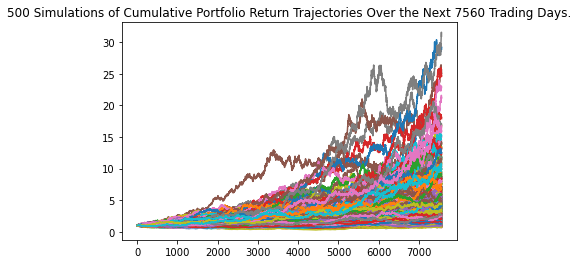

In [79]:
# Plot simulation outcomes
MC_sim.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

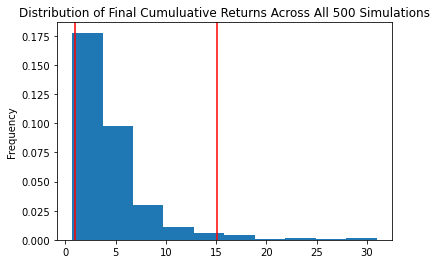

In [80]:
# Plot probability distribution and confidence intervals
MC_sim.plot_distribution()

### Retirement Analysis

In [81]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_sim.summarize_cumulative_return()

# Print summary statistics
summary

count           500.000000
mean              4.597014
std               3.821875
min               0.676563
25%               2.366652
50%               3.472055
75%               5.552763
max              30.941693
95% CI Lower      0.974204
95% CI Upper     15.126137
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [82]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round((summary[8] * initial_investment),2)
ci_upper = round((summary[9] * initial_investment),2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $19484.07 and $302522.73


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [83]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $19484.07 and $302522.73


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [84]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# sorry i would love to but i'm short on time. i may go back to this for practice in the future.

In [85]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [86]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [87]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [88]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [89]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


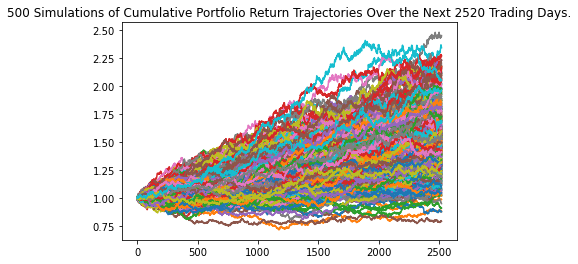

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

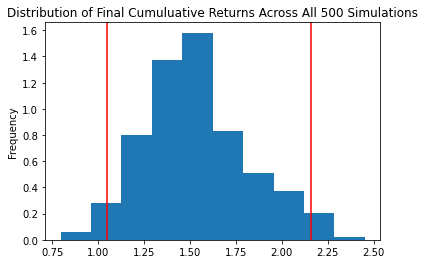

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
